# Decision Tree & Random Forest

This program uses labeled data from LendingClub to train a deision tree and a random forest model to predict whether a borrower will be able to pay back the borowed amount in full or not. 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df = pd.read_csv('LendingClub_loan_data.csv')

In [99]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [101]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


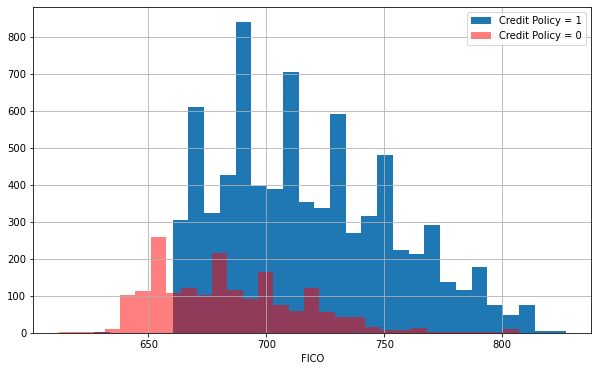

In [102]:
plt.figure(figsize = (10,6))
df['fico'][df['credit.policy'] == 1].hist(bins = 30)
df['fico'][df['credit.policy'] != 1].hist(bins = 30, color = 'red', alpha = 0.5)
plt.xlabel('FICO')
plt.legend(['Credit Policy = 1','Credit Policy = 0'])

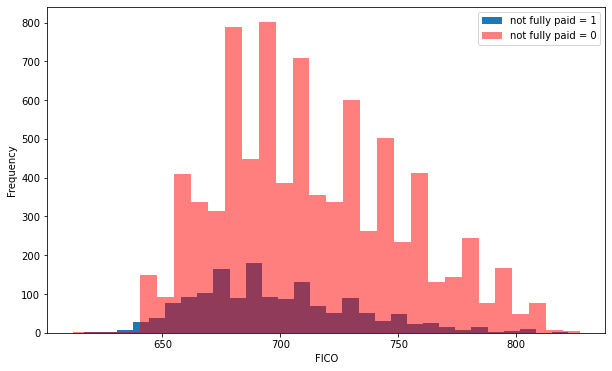

In [103]:
plt.figure(figsize = (10,6))
df['fico'][df["not.fully.paid"] == 1].plot.hist(bins = 30)
df['fico'][df["not.fully.paid"] != 1].plot.hist(bins = 30, color = 'red', alpha = 0.5)
plt.xlabel('FICO')
plt.legend(['not fully paid = 1','not fully paid = 0'])

In [104]:
df_p = df.groupby(['purpose', 'not.fully.paid']).count()
df_p

credit.policy  int.rate  installment  \
purpose            not.fully.paid                                         
all_other          0                        1944      1944         1944   
                   1                         387       387          387   
credit_card        0                        1116      1116         1116   
                   1                         146       146          146   
debt_consolidation 0                        3354      3354         3354   
                   1                         603       603          603   
educational        0                         274       274          274   
                   1                          69        69           69   
home_improvement   0                         522       522          522   
                   1                         107       107          107   
major_purchase     0                         388       388          388   
                   1                          49        49           49   
small_business     0                         447       447          447   
                   1                         172       172          172   

                                   log.annual.inc   dti  fico  \
purpose            not.fully.paid                               
all_other          0                         1944  1944  1944   
                   1                          387   387   387   
credit_card        0                         1116  1116  1116   
                   1                          146   146   146   
debt_consolidation 0                         3354  3354  3354   
                   1                          603   603   603   
educational        0                          274   274   274   
                   1                           69    69    69   
home_improvement   0                          522   522   522   
                   1                          107   107   107   
major_purchase     0                          388   388   388   
                   1                           49    49    49   
small_business     0                          447   447   447   
                   1                          172   172   172   

                                   days.with.cr.line  revol.bal  revol.util  \
purpose            not.fully.paid                                             
all_other          0                            1944       1944        1944   
                   1                             387        387         387   
credit_card        0                            1116       1116        1116   
                   1                             146        146         146   
debt_consolidation 0                            3354       3354        3354   
                   1                             603        603         603   
educational        0                             274        274         274   
                   1                              69         69          69   
home_improvement   0                             522        522         522   
                   1                             107        107         107   
major_purchase     0                             388        388         388   
                   1                              49         49          49   
small_business     0                             447        447         447   
                   1                             172        172         172   

                                   inq.last.6mths  delinq.2yrs  pub.rec  
purpose            not.fully.paid                                        
all_other          0                         1944         1944     1944  
                   1                          387          387      387  
credit_card        0                         1116         1116     1116  
                   1                          146          146      146  
debt_consolidation 0                         3354         3354     3354  
          

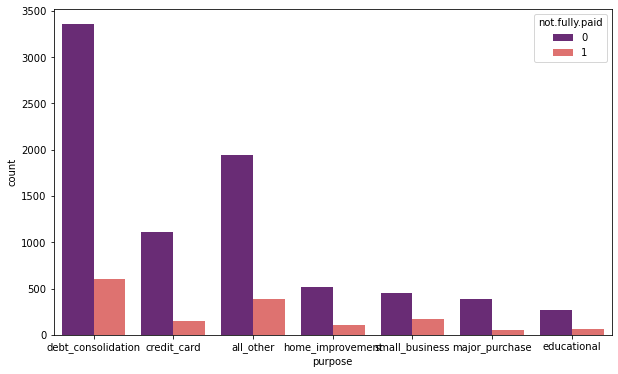

In [105]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df, palette = 'magma')

<Figure size 432x288 with 0 Axes>

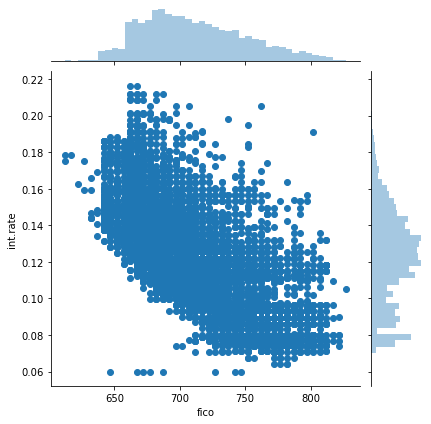

In [106]:
plt.figure()
sns.jointplot(x = 'fico', y ='int.rate', data = df)

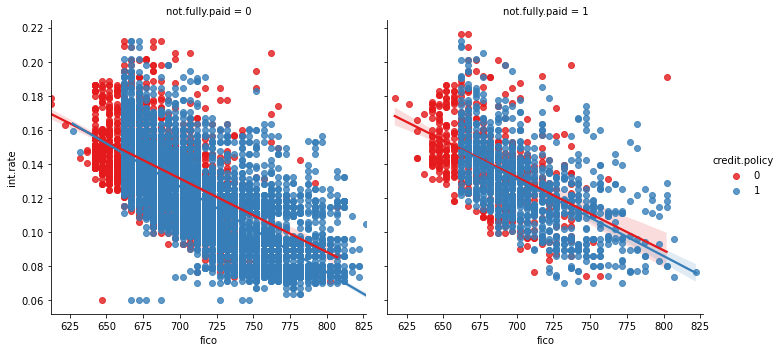

In [107]:
sns.lmplot(x = 'fico', y = 'int.rate', data = df, col = 'not.fully.paid', hue = 'credit.policy', palette = 'Set1')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [109]:
#Now we will get ummy values for purpose column 

pur_list = df.groupby('purpose').count().index

In [110]:
pur_list

Index(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype='object', name='purpose')

In [111]:
Purpose = pd.get_dummies(df['purpose'], columns = pur_list, drop_first = True)

In [61]:
final_data = pd.concat([df,Purpose], axis = 1)

In [112]:
final_data.drop('purpose', axis = 1, inplace = True)


In [113]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [114]:
#data splitting

from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [115]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [116]:
prediction = dt.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1961  453]
 [ 355  105]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2414
           1       0.19      0.23      0.21       460

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.72      0.73      2874



In [70]:
#we can see above that the classification is not so good

In [143]:
#Using Decision Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 650)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=650)

In [144]:
prediction = rfc.predict(X_test)

In [145]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[2408    6]
 [ 455    5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.45      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.78      0.84      0.77      2874



In [146]:
#We can see that the classification report is not so good even though the recall is 1
#note how the dataset provided is lopsided on the target variable

df.groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
0,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045
1,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533


In [147]:
#Examples we have of fully paid are 8045 whereas examples of not fully paid are 1533